In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change the dataset into Pandas dataframe
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/kaggle/emnist/A_Z Handwritten Data.csv")
#anyway check the raw data
dataset.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
#As you know, there are 26 alphabets from A to Z. 
#The first colummn shows labels comprised of "0 to 25", in short, the correct answers.
#For example, "0" is "A". "25" is "Z".
#Process loading dataset and change it into float 32 data, and name the first colummn "label".
dataset.astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
# Now X is "Explanatory variable", y is "Taget".
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [ ]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


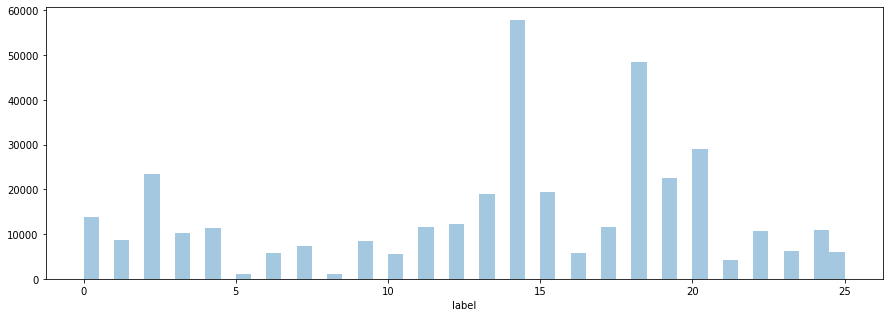

In [ ]:
#import two libraries, matplot, seaborn.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

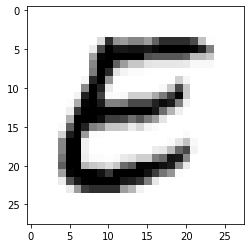

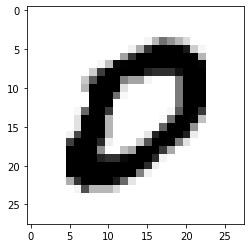

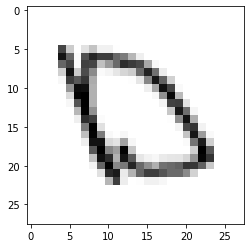

In [ ]:
#import numpy and give a seed. 
import numpy as np
np.random.seed(7)
#Show 3 letter at random and convert them into gray scale letters. 
for i in range(3):
    plt.imshow(X.iloc[np.random.randint(0,372449)].values.reshape(28,28),cmap='Greys')
    plt.show()

In [ ]:
#Now, reload the dataset and change it into "numpy array".
dataset = np.loadtxt('/content/drive/MyDrive/kaggle/emnist/A_Z Handwritten Data.csv', delimiter=',')
#Divide dataset into two parts, one is "Explanatory variable", the other is "Taget".
X = dataset[:,0:784]
Y = dataset[:,0]
#Split the "X,Y" data into the ratio of 7:3, 3 is the test size. 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=2)
#Reshape the data and change it into float 32 as usual.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#The pixcel of the data is comprised from 0 to 255. 0 is white,255 is black.
#Now normalize the data from 0 to 1 without some libraries, in a simple way.
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# One-Hot-Encoding of the target.
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
# Define the classification of 26 alphabets.
num_classes = Y_test.shape[1]

In [ ]:
#Build the second model to look for best or better models.
#Many people says "Adam" is way better than RMSprop. But I wanna try it just in case.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
#Now the second model's optimizer is "RMSprop".
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Check the second model named the model 2.
Train2=model.fit(X_train, Y_train,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 137s 60ms/step - loss: 0.4314 - accuracy: 0.8792
Epoch 2/5
2037/2037 [==============================] - 121s 59ms/step - loss: 0.0692 - accuracy: 0.9811
Epoch 3/5
2037/2037 [==============================] - 121s 60ms/step - loss: 0.0463 - accuracy: 0.9877
Epoch 4/5
2037/2037 [==============================] - 121s 59ms/step - loss: 0.0341 - accuracy: 0.9910
Epoch 5/5
2037/2037 [==============================] - 119s 59ms/step - loss: 0.0260 - accuracy: 0.9933


In [ ]:
#Check the test data of the second model too.
Test2=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
873/873 [==============================] - 52s 59ms/step - loss: 0.0379 - accuracy: 0.9903
Epoch 2/5
873/873 [==============================] - 51s 58ms/step - loss: 0.0237 - accuracy: 0.9941
Epoch 3/5
873/873 [==============================] - 53s 61ms/step - loss: 0.0165 - accuracy: 0.9959
Epoch 4/5
873/873 [==============================] - 51s 59ms/step - loss: 0.0118 - accuracy: 0.9970
Epoch 5/5
873/873 [==============================] - 51s 58ms/step - loss: 0.0087 - accuracy: 0.9976


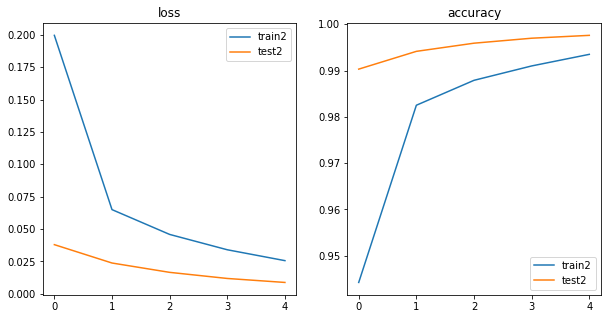

In [ ]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric)  
    plt_train2 = Train2.history[metric]
    plt_test2 = Test2.history[metric] 
    #plot them all
    plt.plot(plt_train2, label='train2') 
    plt.plot(plt_test2, label='test2') 
    plt.legend() 
plt.show()

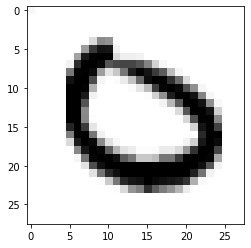

In [ ]:
#Here is the prediction sample.
plt.imshow(X_test[[18]].reshape(28,28),cmap='Greys')

In [ ]:
#Let's predict.
prediction=model.predict(X_test[[18]]) 
prediction

array([[1.4167412e-20, 4.0710833e-12, 1.8030083e-11, 3.2831032e-08,
        8.7494685e-11, 7.6533842e-16, 2.7137255e-13, 1.0306398e-19,
        8.7327150e-22, 1.1388020e-10, 3.4602983e-17, 1.6176215e-15,
        2.3410565e-20, 2.7876325e-14, 9.9999988e-01, 1.4637415e-09,
        4.8341858e-10, 2.0403506e-18, 8.6048972e-09, 1.2599545e-14,
        1.6089324e-07, 1.7777993e-19, 4.4089881e-17, 1.3612944e-25,
        4.7745839e-11, 2.7272631e-17]], dtype=float32)

In [ ]:
#Preparation for this predction. 
alphabets="abcdefghijklmnopqrstuvwxyz"
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in alphabets]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)])


The answer is o


In [ ]:
# Prediction on external image...
import cv2
img = cv2.imread(r'/content/drive/MyDrive/clg project/D.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
npimg = np.array(img_final)

prediction=model.predict(npimg) 
prediction

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#Preparation for this predction. 
alphabets="abcdefghijklmnopqrstuvwxyz"
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in alphabets]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)])


The answer is o
